## Sentiment Analysis

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from string import punctuation

from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ensuring that whole data is visible

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# importing the dataset

train_data = pd.read_csv(r"D:\IITR\ML Project\Nexus\Phase 2\archive\train.csv",encoding='latin1')
test_data = pd.read_csv(r"D:\IITR\ML Project\Nexus\Phase 2\archive\test.csv",encoding='latin1')

In [4]:
train_data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [5]:
train_data.shape

(27481, 10)

In [6]:
test_data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [7]:
test_data.shape

(4815, 9)

In [8]:
# droppping the column as we want to merge both the train_data and test_data as of now

train_data.drop("selected_text", axis=1, inplace=True)

In [9]:
train_data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,noon,60-70,Angola,32866272,1246700.0,26


In [10]:
# merging the data

df = pd.concat([train_data,test_data])

In [11]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [12]:
df.shape

(32296, 9)

In [13]:
# checking for date column datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32296 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   sentiment         31015 non-null  object 
 3   Time of Tweet     31015 non-null  object 
 4   Age of User       31015 non-null  object 
 5   Country           31015 non-null  object 
 6   Population -2020  31015 non-null  float64
 7   Land Area (Km²)   31015 non-null  float64
 8   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(6)
memory usage: 2.5+ MB


In [14]:
# data statistics

df.describe(exclude='object')

,Population -2020,Land Area (Km²),Density (P/Km²)
count,3.101500e+04,3.101500e+04,31015.000000
mean,4.009768e+07,6.633212e+05,356.684733
std,1.500845e+08,1.811039e+06,2008.450729
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


## Handling Missing Values

In [15]:
# looking for missing values and dropping it

df.isnull().sum()

textID              1281
text                1282
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [16]:
df1 = df.dropna()

In [17]:
df1.shape

(31014, 9)

## Removing Unnecessary Characters

In [18]:
def clean_and_normalize_text(text):
  
  text = str(text)  # Ensuring the text is string
  text = re.sub(r'<.*?>|https?://\S+|www\.\S+|[^\w\s]', '', text.lower())  # lowercasing and removing special characters like punctuations
  text = re.sub(r'\s+', ' ', text).strip()  # Removing extra spaces
  return text

df1['cleaned_text'] = df1['text'].apply(clean_and_normalize_text)

## Tokenization

In [19]:
# converting clean text into word tokens

def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []
df1['tokens'] = df1['cleaned_text'].apply(tokenize_text)

## Removing Stopwords

In [20]:
def remove_stopwords(tokens):
  if isinstance(tokens, list):
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords.words('english')]
    return filtered_tokens
  else:
    return []

df1['text_without_stopwords'] = df1['tokens'].apply(remove_stopwords)

## Lemmatization

In [21]:
def lemmatize_tokens(tokens):
    
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = []
  for token in tokens:
    lemma = lemmatizer.lemmatize(token)
    lemmatized_tokens.append(lemma)
  return lemmatized_tokens

df1['lemmatized_tokens'] = df1['text_without_stopwords'].apply(lemmatize_tokens)

In [22]:
df1.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text,tokens,text_without_stopwords,lemmatized_tokens
0,cb774db0d1,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,id have responded if i were going,"[id, have, responded, if, i, were, going]","[id, responded, going]","[id, responded, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,2877797.0,27400.0,105.0,sooo sad i will miss you here in san diego,"[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, miss, san, diego]","[sooo, sad, miss, san, diego]"
2,088c60f138,my boss is bullying me...,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,my boss is bullying me,"[my, boss, is, bullying, me]","[boss, bullying]","[bos, bullying]"
3,9642c003ef,what interview! leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0,what interview leave me alone,"[what, interview, leave, me, alone]","[interview, leave, alone]","[interview, leave, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0,sons of why couldnt they put them on the relea...,"[sons, of, why, couldnt, they, put, them, on, ...","[sons, couldnt, put, releases, already, bought]","[son, couldnt, put, release, already, bought]"


## Data Visualization

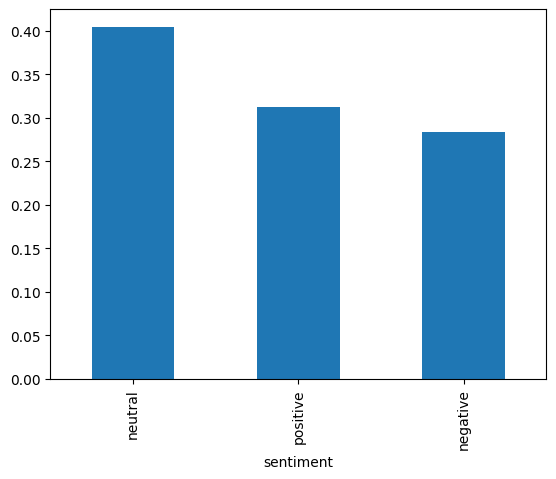

In [23]:
df1['sentiment'].value_counts(normalize=True).plot(kind='bar');

In [24]:
# distribution of different sentiments

df1['sentiment'].value_counts()

sentiment
neutral     12547
positive     9685
negative     8782
Name: count, dtype: int64

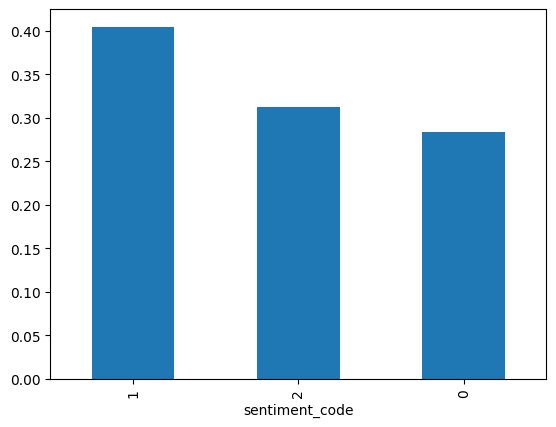

In [25]:
df1['sentiment_code'] = df1['sentiment'].astype('category').cat.codes
sentiment_distribution = df1['sentiment_code'].value_counts(normalize=True)
sentiment_distribution.plot(kind='bar')
plt.show()

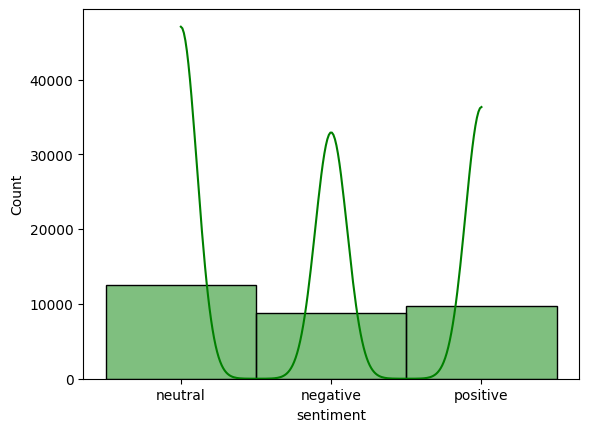

In [26]:
sns.histplot(df1['sentiment'], kde=True, color = 'g')
plt.show()

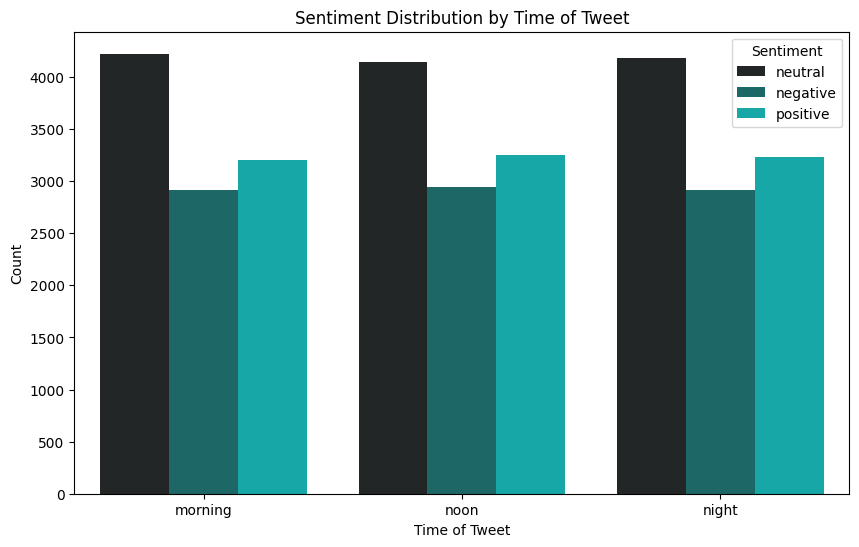

In [27]:
# Plotting figure of Time of Tweet vs Sentiment

df2 = df1[['Time of Tweet','sentiment']]
plt.figure(figsize=(10, 6))
sns.countplot(x='Time of Tweet', hue='sentiment', data=df2, color='c')
plt.title('Sentiment Distribution by Time of Tweet')
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

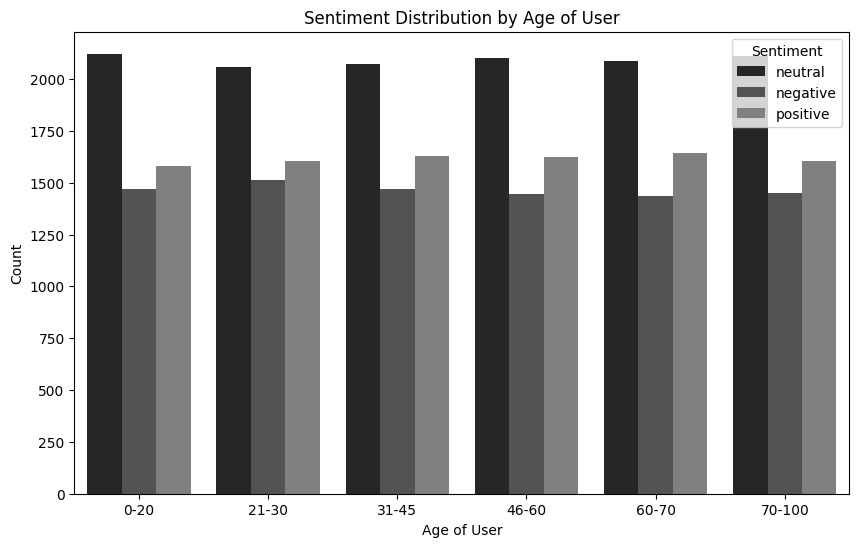

In [28]:
# Plotting figure of Age of User vs Sentiment

df2 = df1[['Age of User','sentiment']]
plt.figure(figsize=(10, 6))
sns.countplot(x='Age of User', hue='sentiment', data=df2, color='gray')
plt.title('Sentiment Distribution by Age of User')
plt.xlabel('Age of User')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

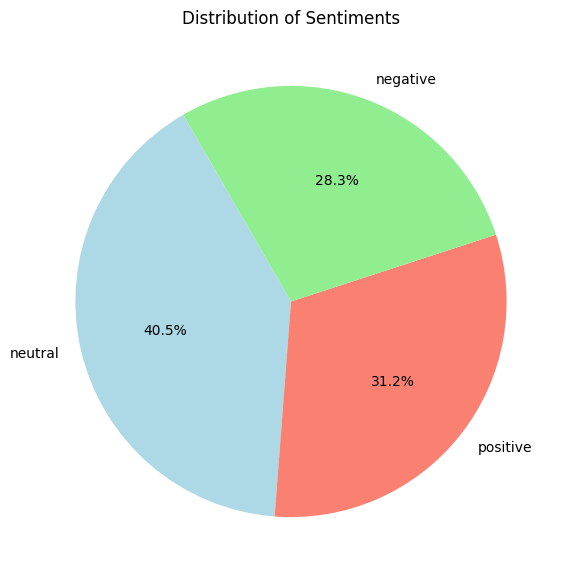

In [29]:
# Plotting of Distribution of Sentiments

sentiment_counts = df1['sentiment'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=120, colors=['lightblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Sentiments')
plt.show()

## Creating Final Corpus

In [30]:
corpus = []
for tokens in df1['lemmatized_tokens']:
  joined_tokens = " ".join(tokens)  # Joining tokens with space
  corpus.append(joined_tokens)

df1['corpus'] = corpus  # Adding final corpus as a new column

In [31]:
df1.columns

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)',
       'cleaned_text', 'tokens', 'text_without_stopwords', 'lemmatized_tokens',
       'sentiment_code', 'corpus'],
      dtype='object')

## TF-IDF Vectorization

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df1['corpus'])
y = df1['sentiment']

## Train_Test_Splitting

In [33]:
# Using StratifiedShuffleSplit inorder to ensure even distribution of the sentiments characteristic

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42,stratify = y)

In [34]:
y_train.value_counts()

sentiment
neutral     8406
positive    6489
negative    5884
Name: count, dtype: int64

In [35]:
y_test.value_counts()

sentiment
neutral     4141
positive    3196
negative    2898
Name: count, dtype: int64

## Selecting a desired model and Evaluating it

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score, f1_score, roc_auc_score,roc_curve

In [37]:
models={
    "Support Vector Machines": LinearSVC(),
    "Naive Bayes": MultinomialNB()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Making predictions
    y_train_pred = model.predict(X_train)
   
    # Training dataset performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted') # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted') # Calculate Recall


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))

    
    print('----------------------------------')
    print('='*35)
    print('\n')

Support Vector Machines
Model performance for Training set
- Accuracy: 0.9345
- F1 score: 0.9345
- Precision: 0.9345
- Recall: 0.9345
----------------------------------


Naive Bayes
Model performance for Training set
- Accuracy: 0.7921
- F1 score: 0.7905
- Precision: 0.8274
- Recall: 0.7921
----------------------------------




## Using better evaluation technique - Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

def evaluate_models(X_train, y_train, models, cv=10):
  
  for model_name, model in models.items():
    # Perform cross-validation and calculating different scores
    f1_scores = cross_val_score(model, X_train, y_train, scoring="f1_micro", cv=cv)
    precision_scores = cross_val_score(model, X_train, y_train, scoring="precision_micro", cv=cv)
    recall_scores = cross_val_score(model, X_train, y_train, scoring="recall_micro", cv=cv)
    accuracy_scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=cv)

    # Calculating average scores
    average_f1 = f1_scores.mean()
    average_precision = precision_scores.mean()
    average_recall = recall_scores.mean()
    average_accuracy = accuracy_scores.mean()

    print(f"Model: {model_name}")
    print(f"Average F1-score: {average_f1:.4f}")
    print(f"Average Precision: {average_precision:.4f}")
    print(f"Average Recall: {average_recall:.4f}")
    print(f"Average Accuracy: {average_accuracy:.4f}")
    print("-" * 30)  # Separator

In [39]:
models={
    "Support Vector Machines": LinearSVC(),
    "Naive Bayes": MultinomialNB()
}

# Cross validation for different models
evaluate_models(X_train, y_train, models, cv=5)

Model: Support Vector Machines
Average F1-score: 0.6679
Average Precision: 0.6679
Average Recall: 0.6679
Average Accuracy: 0.6679
------------------------------
Model: Naive Bayes
Average F1-score: 0.6111
Average Precision: 0.6111
Average Recall: 0.6111
Average Accuracy: 0.6111
------------------------------


## Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# Hyperparameter Tuning for Linear SVC

param_grid = {
  'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
  'loss': ['hinge', 'squared_hinge'],  # Loss function
}

linear_svc_model = LinearSVC()  # Defining the base model (LinearSVC classifier)

grid_search = GridSearchCV(estimator=linear_svc_model, param_grid=param_grid, cv=5)  # Setting cv for 5-fold cross-validation

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'C': 1, 'loss': 'hinge'}
Best Model: LinearSVC(C=1, loss='hinge')


In [42]:
# Hyperparameter Tuning for MultinomialNB

param_grid = {
  'alpha': np.logspace(-10, -2, num=10),  # Smoothing parameter
}

# Naive Bayes model and GridSearchCV object
model = MultinomialNB()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)  # Set cv for 5-fold cross-validation

# Fitting the GridSearchCV object to our data
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'alpha': 0.01}
Best Model: MultinomialNB(alpha=0.01)


## Comparing the models after hyperparameter tuning

In [43]:
models={
    "Support Vector Machines": LinearSVC(C=1, loss='hinge'),
    "Naive Bayes": MultinomialNB(alpha=0.01)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
   
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted') # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted') # Calculate Recall


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))

    
    print('----------------------------------')
    print('='*35)
    print('\n')

Support Vector Machines
Model performance for Training set
- Accuracy: 0.8512
- F1 score: 0.8513
- Precision: 0.8522
- Recall: 0.8512
----------------------------------


Naive Bayes
Model performance for Training set
- Accuracy: 0.9003
- F1 score: 0.9004
- Precision: 0.9013
- Recall: 0.9003
----------------------------------




In [44]:
# Using cross validation to compare hyperparameter tuned models

models={
    "Support Vector Machines": LinearSVC(C=1, loss='hinge'),
    "Naive Bayes": MultinomialNB(alpha=0.01)
}

evaluate_models(X_train, y_train, models, cv=5)

Model: Support Vector Machines
Average F1-score: 0.6871
Average Precision: 0.6871
Average Recall: 0.6871
Average Accuracy: 0.6871
------------------------------
Model: Naive Bayes
Average F1-score: 0.5791
Average Precision: 0.5791
Average Recall: 0.5791
Average Accuracy: 0.5791
------------------------------


## Testing the model on test data

In [45]:
# Finally testing our model on Testing Dataset and evaluating it using evaluation metrics used earlier

model = LinearSVC(C=1, loss='hinge')
model.fit(X_train, y_train)

Y_test_pred = model.predict(X_test)

model_test_accuracy = accuracy_score(y_test, Y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, Y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, Y_test_pred, average='weighted') # Calculate Precision
model_test_recall = recall_score(y_test, Y_test_pred, average='weighted') # Calculate Recall

print('Model performance for Testing set')
print("- Accuracy: {:.4f}".format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))


Model performance for Testing set
- Accuracy: 0.6886
- F1 score: 0.6884
- Precision: 0.6960
- Recall: 0.6886


## Evaluation Metrics

In [46]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score

In [47]:
# Confusion Matrix

cm = confusion_matrix(y_test, Y_test_pred)
print(cm)

[[1704 1018  176]
 [ 535 3051  555]
 [ 111  792 2293]]


In [48]:
# Binarizing the labels as positive and non-positive

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test)  # Fitting the LabelBinarizer with our data
y_test_binary = lb.transform(y_test)[:, 0]  
Y_test_pred_new = lb.transform(Y_test_pred)[:, 0] 

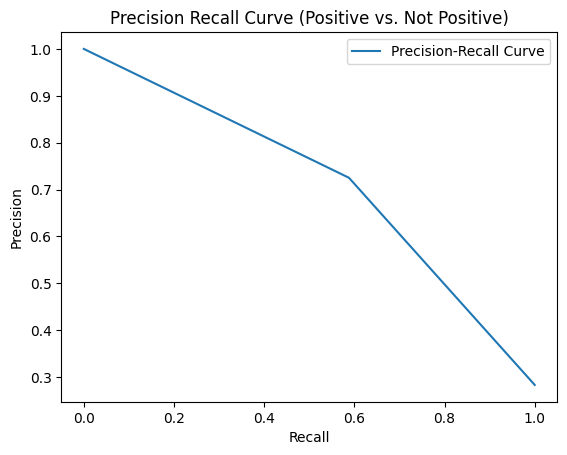

In [49]:
# Plotting precision recall curve

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test_binary,Y_test_pred_new)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve (Positive vs. Not Positive)')
plt.legend()
plt.show()

ROC-AUC Score: 0.7500


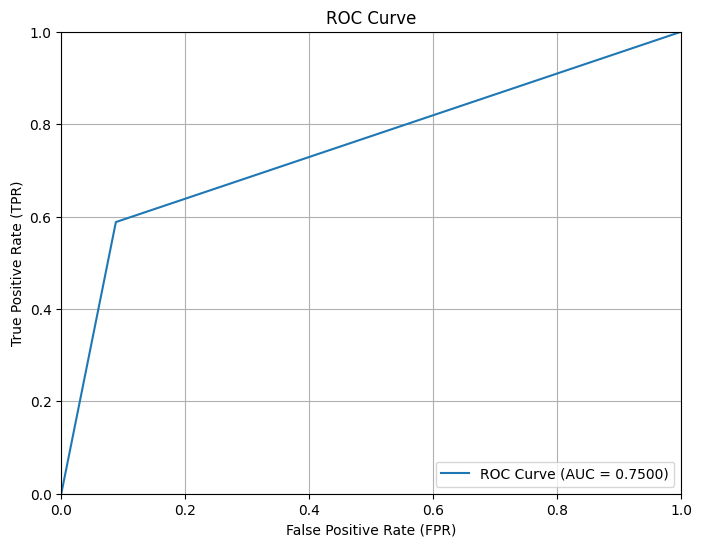

In [50]:
# Plotting ROC-AUC curve

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test_binary, Y_test_pred_new)
print(f"ROC-AUC Score: {roc_auc:.4f}")

from sklearn.metrics import roc_curve

# Getting ROC curve data
fpr, tpr, thresholds = roc_curve(y_test_binary, Y_test_pred_new)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.4f)' % roc_auc)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.legend(loc='lower right')
plt.show()
